# IT'S.....PRECIPITATION TIME!

# Introduction + data used:
- In this assignment, you'll explore precipitation data!
<br><br>
- What you'll be analyzing is daily precipitation data for the continental US for the year 2020
<br><br>
- It's important to clarify that this is *liquid* precipitation - so snow is measured by its liquid equivalent 
<br><br>
- Want more information on the data? (You should! #metadataisimportant): 
https://psl.noaa.gov/data/gridded/data.unified.daily.conus.rt.html

#### Import xarray as xr, numpy as np, and pyplot from matplotlib as plt

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

#### Let's open our data file! *I GIVE YOU THE CODE FOR THIS*

In [3]:
# open_dataarray is one of the main functions in Xarray to open a Netcdf file!
# the other function is open_dataset.  If our netcdf file contained MULTIPLE variables
# say, precip, and temperature, etc.
# we would instead open it as a dataset, and access specific variables separately
data = xr.open_dataset('precip.V1.0.2020.nc')

#### Prints out information about the data in this Netcdf file.  *I GIVE YOU THE CODE FOR THIS*
- Remember: Netcdf is a binary file format, and we'll work a lot with it in future using the Xarray package, especially for *spatial* data!

In [4]:
# Print
print(data) # since we opened this Netcdf file and read directly in a data array variable
            # 'data' contains the precipitation data we are working with

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 366)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...


In [5]:
print(data.coords) # coords is an attribute of the Xarray data array variable that will specifically give us coordinate info
# if you look in the cell above, this metadata is also included when just simply printing the Xarray data array variable itself

Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31


## *YOUR TURN*:  
#### (1) Let's start thinking more about spatial data (much more to follow in next week's lessons!) Based on the metadata printed out above:
 - (a.)  what are the precipitation variable's UNITS?
<br><br>
 - (b.)  what are the precipitation variable's COORDINATES? 
    - You *MUST* include a description of the direction of the order of each of the spatial coordinates (northward? southward? eastward? westward?)

In [7]:
# (a.) 
print(f"The precipitation variable's UNITS are: mm")


The precipitation variable's UNITS are: mm


In [9]:
# (b.) what are the precipitation variable's COORDINATES?
print(f"The precipitation variable's COORDINATES are: {data.coords}")
# You *MUST* include a description of the direction of the order of each of the spatial coordinates (northward? southward? eastward? westward?)
print(f"The latitude coordinate is northward, and the longitude coordinate is eastward")



The precipitation variable's COORDINATES are: Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
The latitude coordinate is northward, and the longitude coordinate is eastward


#### Save the coordinate variables of lat, lon, and time each to their own variable (technically, each a data array) *I GIVE YOU THE CODE FOR THIS*

In [10]:
lat2 = data['lat'] # these are *coordinate* variables in the Netcdf file
                          # they are affiliated with the data array, 'data'
                          # and thus we can access them like this!
print(lat2)
lon2 = data['lon']
print(lon2)
times2 = data['time']
print(times2)

<xarray.DataArray 'lat' (lat: 120)>
array([20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875, 22.125,
       22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875, 24.125, 24.375,
       24.625, 24.875, 25.125, 25.375, 25.625, 25.875, 26.125, 26.375, 26.625,
       26.875, 27.125, 27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875,
       29.125, 29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 32.875, 33.125, 33.375,
       33.625, 33.875, 34.125, 34.375, 34.625, 34.875, 35.125, 35.375, 35.625,
       35.875, 36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875, 40.125,
       40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875, 42.125, 42.375,
       42.625, 42.875, 43.125, 43.375, 43.625, 43.875, 44.125, 44.375, 44.625,
       44.875, 45.125, 45.375, 45.625, 45.875, 46.125, 46.375, 46.625, 46.875,
       47.125, 4

#### Convert each of the three data arrays into a NumPy array  *I GIVE YOU THE CODE FOR THIS*
- Since you haven't learned Xarray yet, let's get data into a format you know how to work with!

In [19]:
precip = data['precip'].values # nifty function that converts the Xarray data array variable into a NumPy array
# 'precip' contains all the precip data, fyi
lat = lat2.values # values of the latitude coordinate variable
lon = lon2.values # values of the longitude coordinate variable

In [18]:
data

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 300, time: 366)
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    Conventions:    COARDS
    history:        created 04/2010 by CAS from data obtained from NCEP/CPC\n...
    description:    Gridded daily Precipitation
    platform:       Observations
    Comments:       Preciptation is accumulated from 12z of previous day to 1...
    dataset_title:  CPC Unified Gauge-Based Analysis of Daily Precipitation o...
    References:     http://www.psl.noaa.gov/data/gridded/data.unified.daily.c...

## *YOUR TURN, AGAIN, FROM HERE TO END OF ASSIGNMENT*
#### (2)  Evaluating dimensions!
 - (a.) Evaluate and print the shape of each of these three NumPy arrays: lat, lon, and precip
<br><br>
 - (b.) What are the dimensions of precip, physically, based on your answer to (a.), and your work in Q1?  Please provide the *names*, and please list the dimensions in the *order* they are structured in this NumPy array <br><br>

In [20]:
# (a.) Evaluate and print the shape of each of these three NumPy arrays: lat, lon, and precip
print(f"The shape of the latitude coordinate variable is: {lat.shape}")
print(f"The shape of the longitude coordinate variable is: {lon.shape}")
print(f"The shape of the precipitation variable is: {precip.shape}")




The shape of the latitude coordinate variable is: (120,)
The shape of the longitude coordinate variable is: (300,)
The shape of the precipitation variable is: (366, 120, 300)


In [21]:
# (b.) What are the dimensions of precip, physically, based on your answer to (a.), and your work in Q1? Please provide the names, and please list the dimensions in the order they are structured in this NumPy array
precip_dim = np.array(['time', 'lat', 'lon'])
print(f"Three dimensions of the precipitation variable are: {precip_dim}")


Three dimensions of the precipitation variable are: ['time' 'lat' 'lon']


#### (3)  Array operations - unit conversion
- (a.) Convert from mm of daily precip to inches using an array operation (i.e., not a loop, of course, and simply a SINGLE line of code!)
<br><br>
- (b.) Comment on if what you just did would be faster or slower than doing this instead using a *for loop*. *Why* would this be the case, conceptually?

In [27]:
# (a.) Convert from mm of daily precip to inches using an array operation (i.e., not a loop, of course, and simply a SINGLE line of code!)
precip = precip * 0.0393701 # 0.0393701 is the conversion factor from mm to inches
print(f"The precip array in inches is: {precip}")


The precip array in inches is: [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan na

#### (b.) Comment on if what you just did would be faster or slower than doing this instead using a *for loop*. *Why* would this be the case, conceptually?

What I did was broadcasting (UFuncs). Broadcasting is faster than doing this using a for loop. The reason is thst for loops are explicit loop, i.e. one element per each iteration of the loop, which makes a huge difference. The issue here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. 

Broadcasting is an implicit loop. Such vectorized operation can be accomplished by performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.



#### (4)  Exploring daily precipitation data at the gridpoint nearest UIUC campus
- (a.) Find, using code and NO HARDWIRING/MANUAL WORK, the indices of the nearest gridpoint to the UIUC campus.  Save these indices to new variables, and print out the values. *You may need to use a NumPy function I haven't formally taught you to determine the indices of the gridpoint nearest UIUC campus - do some exploration! #healthy*
    - *suggestion*: draw a diagram to help you figure out what basic math/geometry you would code for this
    - if you get stuck on this, you can manually determine the gridpoint so that you can still procceed forward with the rest of the questions on this homework (but of course you would lose points on this exact Q)
    - post on Slack if you need a hint on how to do (a.) - this is a *spatial analysis* task!
<br><br>
- (b.) Print the corresponding lat/lon of that gridpoint. 
<br><br>
- (c.) Index your precip array so that you are only accessing data at this special location.
<br><br>
- (d.) Evaluate and print the shape of your precip array when now only looking at precipitation data at this special location.  This will help you understand what exactly you're plotting in (e.) and (f.)
<br><br>
- (e.) Create a line plot of the precipitation data at this special location.
   - Don't forget axis labels! And a title!
<br><br>
- (f.) Create a histogram of your precipitation data at this special location.  Please explicitly set the number of bins you think will be most appropriate to display the data in a way that is interpretable - you may want to play around with this!
<br><br>
- (g.) *Interpretation time*: looking at your histogram, does the data of daily precipitaton values at UIUC take on approximately a theoretical normal distribution?  Why or why not?  Please be as specific as possible, i.e., provide details to support your claim.

In [28]:
# (a.) Find, using code and NO HARDWIRING/MANUAL WORK, the indices of the nearest gridpoint to the UIUC campus. Save these indices to new variables, and print out the values. 
lat_uiuc = 40.1
# lon of uiuc in eastward direction
lon_uiuc = -88.2 + 360
# find the index of the nearest gridpoint to the uiuc lat and lon from the lat and lon arrays
index_lat = np.abs(lat - lat_uiuc).argmin()
index_lon = np.abs(lon - lon_uiuc).argmin()
# print the index of the nearest gridpoint to the uiuc lat and lon
print(f"The index of the nearest gridpoint to the uiuc lat and lon is: {index_lat}, {index_lon}")


The index of the nearest gridpoint to the uiuc lat and lon is: 80, 167


In [29]:
# (b.) Print the corresponding lat/lon of that gridpoint.
print(f"The corresponding lat/lon of that gridpoint is: {lat[index_lat]}, {lon[index_lon]}")

The corresponding lat/lon of that gridpoint is: 40.125, 271.875


In [30]:
# (c.) Index your precip array so that you are only accessing data at this special location.
#      (i.e., at the gridpoint nearest to the UIUC campus)
# precip has dimensions time, lat, lon
precip_uiuc = precip[:, index_lat, index_lon]


In [31]:
# (d.) Evaluate and print the shape of your precip array when now only looking at precipitation data at this special location. This will help you understand what exactly you're plotting in (e.) and (f.)
print(f"The shape of the precip array when only looking at precipitation data at the nearest gridpoint is: {precip_uiuc.shape}")


The shape of the precip array when only looking at precipitation data at the nearest gridpoint is: (366,)


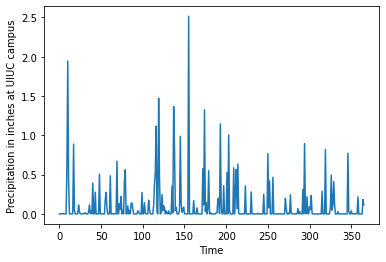

In [35]:
# (e.) Create a line plot of the precipitation data at this special location.
# Plot your line plot!
# axis labels are x-axis: time array (the shape of precip_uiuc), y-axis: precip in inches at this special location
plt.plot(precip_uiuc)
plt.xlabel("Time")
plt.ylabel("Precipitation in inches at UIUC campus")
plt.show()

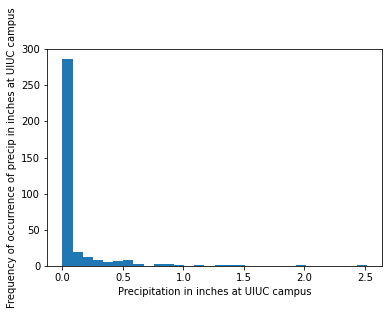

In [41]:
# (f.) Create a histogram of your precipitation data at this special location. Please explicitly set the number of bins you think will be most appropriate to display the data in a way that is interpretable - you may want to play around with this!
# Plot your histogram!
# axis labels are x-axis: precip in inches at this special location, y-axis: frequency of occurrence of precip in inches at this special location
plt.hist(precip_uiuc, bins=30)
plt.xlabel("Precipitation in inches at UIUC campus")
plt.ylabel("Frequency of occurrence of precip in inches at UIUC campus")
plt.show()

##### Interpretation of the histogram
##### (g.) Interpretation time: looking at your histogram, does the data of daily precipitaton values at UIUC take on approximately a theoretical normal distribution? Why or why not? Please be as specific as possible, i.e., provide details to support your claim.

Looking at the histogram, I can see that the data of daily precipitation values at UIUC is not normally distributed. The data is not normally distributed because the data is not evenly distributed. The histogram is not bell shaped. This is a sample of size 30 from a right-skewed distribution, plotted as a histogram. It looks like a right-skewed distribution because the distribution is one in which the tail is on the right side of the graph. For normal distribution, a center point is at the mean, and the distribution is symmetrical. For a skewed distribution, there is no center point, in the usual sense of the word. 